<a href="https://colab.research.google.com/github/BearDimonR/ML_basics/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### *Developed by [Dmytro Miedviediev](https://github.com/BearDimonR)* **05.05.2021**


In [ ]:
# change working directory
%cd drive/MyDrive/MacPawInternship/data/

! pwd

/content/drive/MyDrive/MacPawInternship/data
/content/drive/MyDrive/MacPawInternship/data


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# open all data files

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_df = pd.read_csv('sample_prediction.csv')

## EDA and Transformation section





#### Basic EDA

In [ ]:
# data analysis imports

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# information about dataframe

print(train_df.shape, test_df.shape)
train_df.info()

(1460, 81) (1459, 80)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null  

In [ ]:
# data sample
train_df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
485,486,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,2007,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,607,Unf,0,506,1113,GasA,...,Y,SBrkr,1113,0,0,1113,0,0,1,0,3,1,Gd,5,Typ,1,Gd,Attchd,1950.0,Unf,1,264,TA,TA,Y,0,80,120,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,147000
1112,1113,20,RL,73.0,7100,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1957,1957,Gable,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,No,GLQ,708,Unf,0,108,816,GasA,...,Y,FuseA,816,0,0,816,1,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1957.0,Unf,1,308,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,129900
1074,1075,20,RL,74.0,8556,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1240,1240,GasA,...,Y,SBrkr,1240,0,0,1240,0,0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2006.0,RFn,3,826,TA,TA,Y,140,93,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,194000
801,802,30,RM,40.0,4800,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,7,1916,1990,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,LwQ,197,Unf,0,999,1196,GasA,...,Y,FuseA,1196,0,0,1196,1,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1957.0,Unf,2,440,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal,109900
1222,1223,50,RL,78.0,10496,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,1Fam,1.5Fin,6,6,1949,1950,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,320.0,TA,TA,CBlock,TA,TA,Mn,Rec,196,Unf,0,844,1040,GasA,...,Y,SBrkr,1168,678,0,1846,0,0,2,0,3,1,TA,7,Typ,1,Gd,Attchd,1949.0,Unf,1,315,TA,TA,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,1,2007,WD,Normal,143000


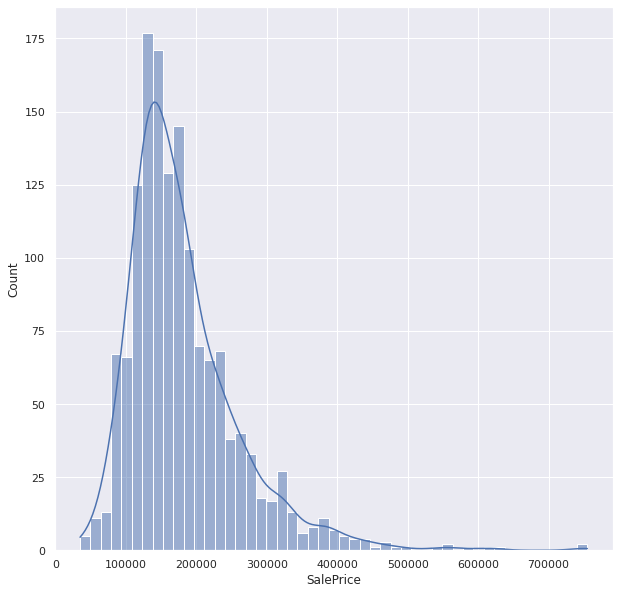

In [ ]:
# sale price histogram
sns.set(rc={'figure.figsize':(10,10)})
sns.histplot(train_df['SalePrice'], kde=True)

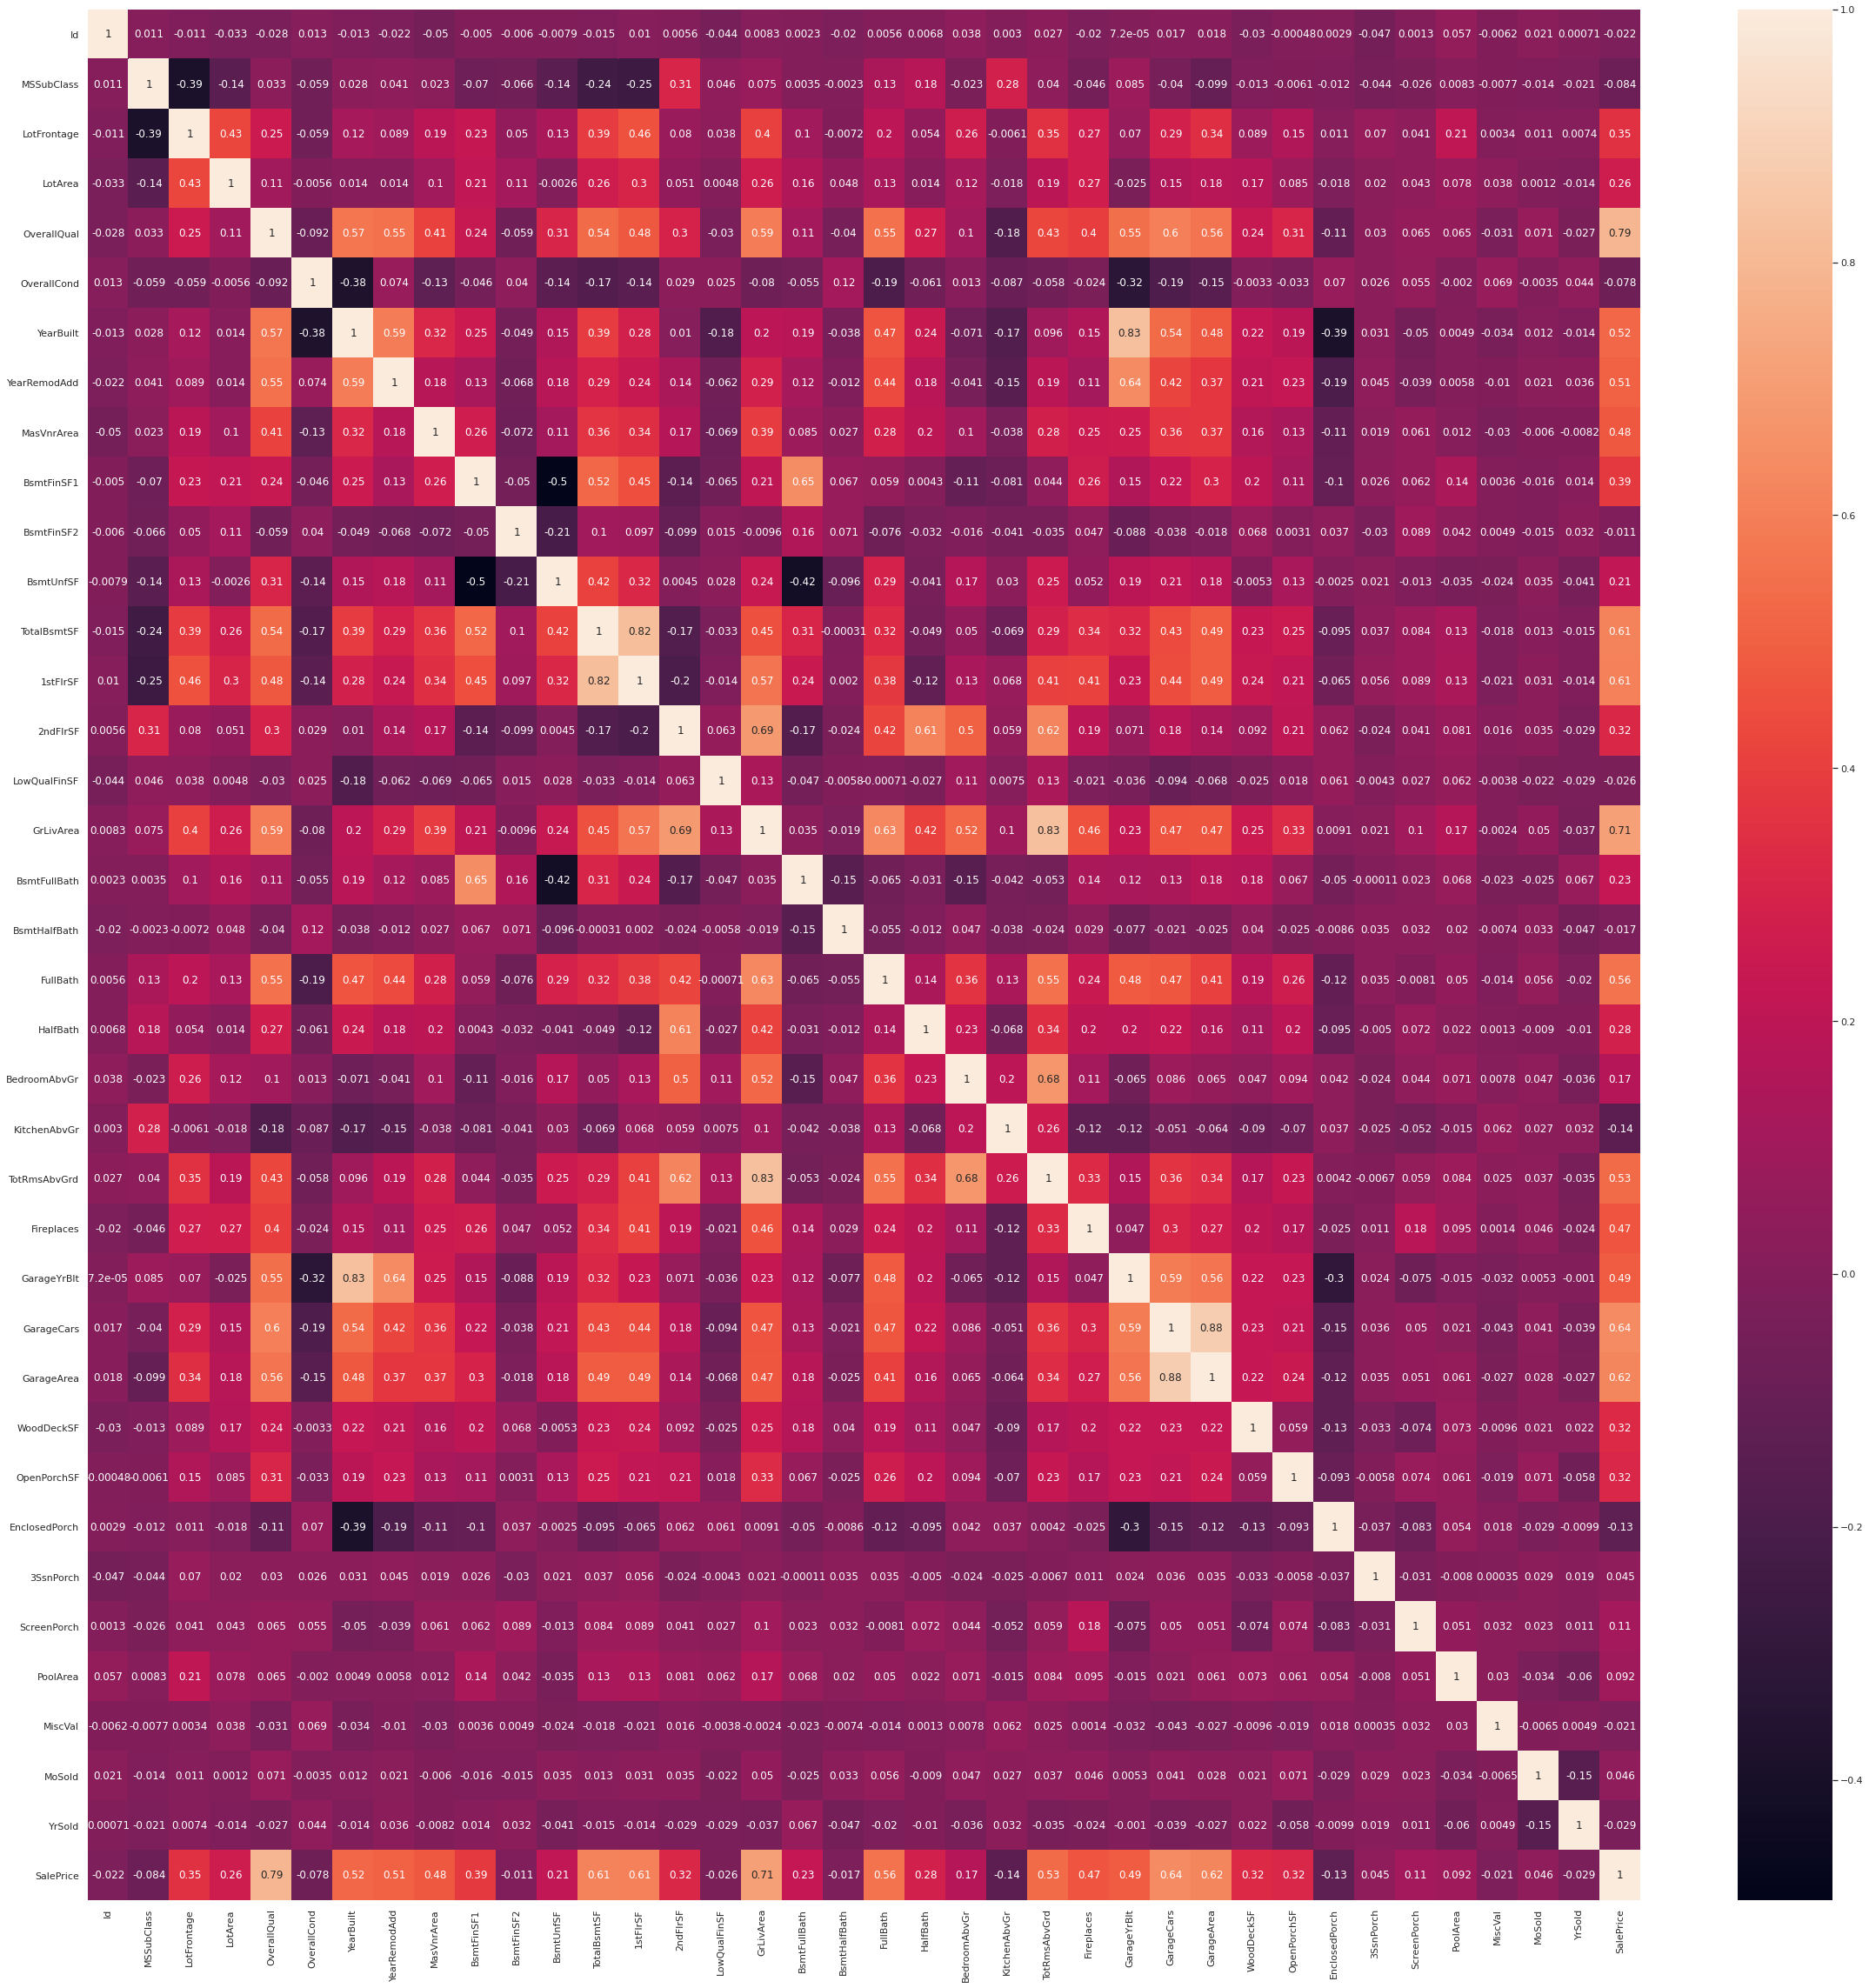

In [ ]:
# correlation with numerical features
sns.set(rc={'figure.figsize':(40,40)})
sns.heatmap(train_df.corr(), annot=True)
plt.show()

From correlation matrix we can determine which features correlates with our target. 

Let`s look at them closer

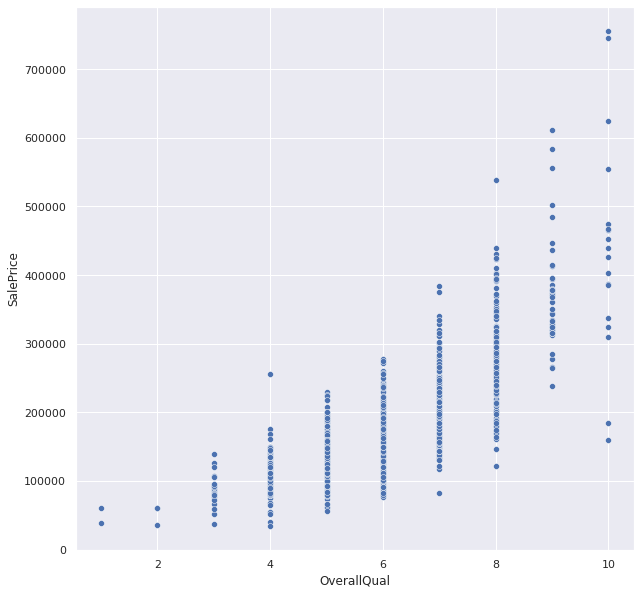

In [ ]:
# OverallQual
sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot(data=train_df, x="OverallQual", y="SalePrice", x_jitter=.1)

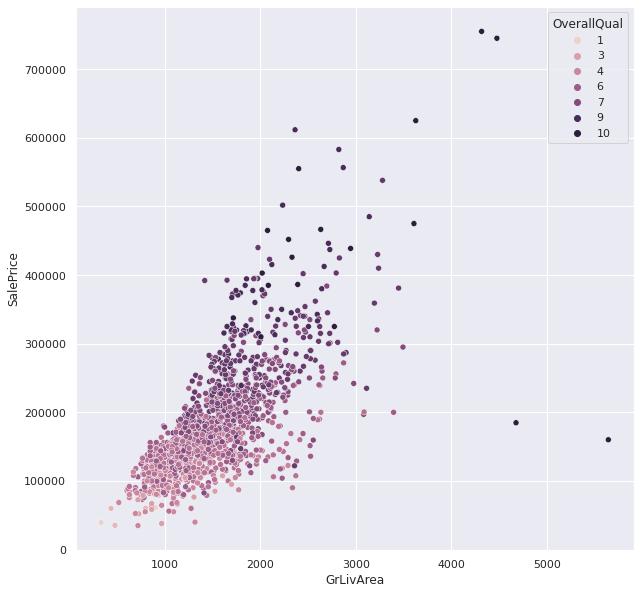

In [ ]:
# OverallQual and GrLivArea

sns.scatterplot(data=train_df, x="GrLivArea", y="SalePrice", hue="OverallQual")

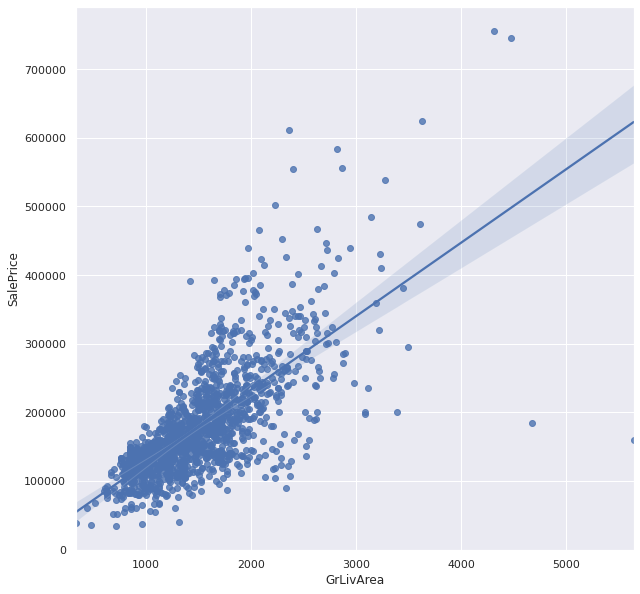

In [ ]:
# GrLivArea

sns.regplot(data=train_df, x="GrLivArea", y="SalePrice")

Obviously, price hugely depends on total living area and quality of the house.

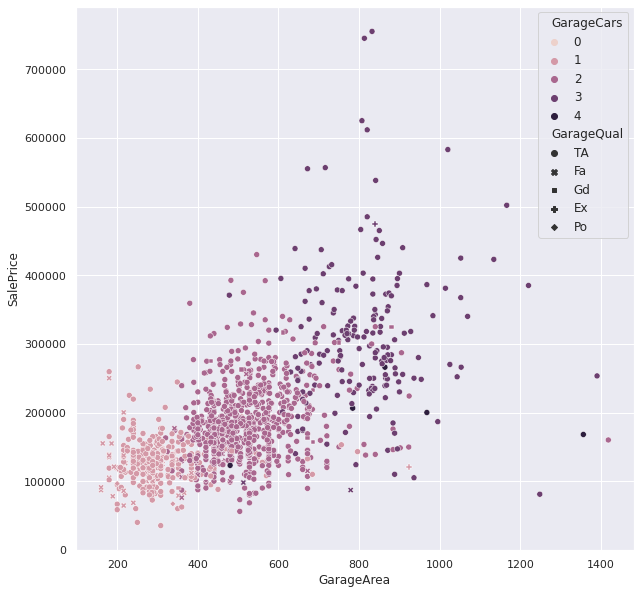

In [ ]:
# GarageCars and GarageArea

sns.scatterplot(data=train_df, x="GarageArea", y="SalePrice", hue="GarageCars", style="GarageQual")

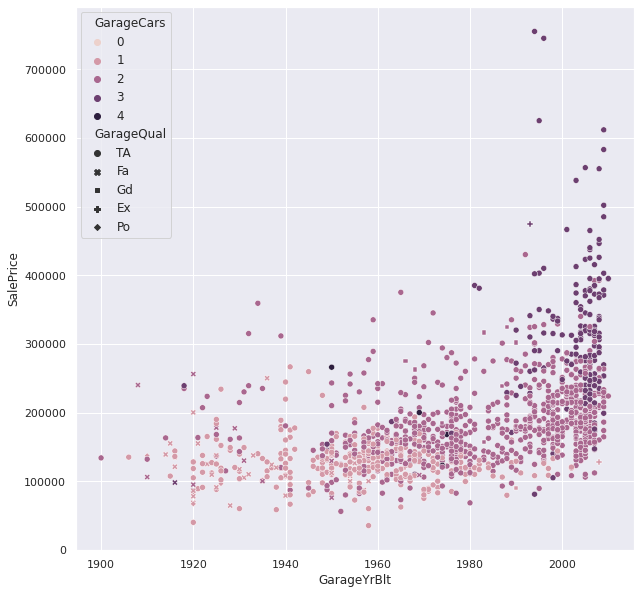

In [ ]:
sns.scatterplot(data=train_df, x="GarageYrBlt", y="SalePrice", hue="GarageCars", style="GarageQual")

It`s interesting to find out that garage is also very important part for price determitation. The better garage, the bigger price. 

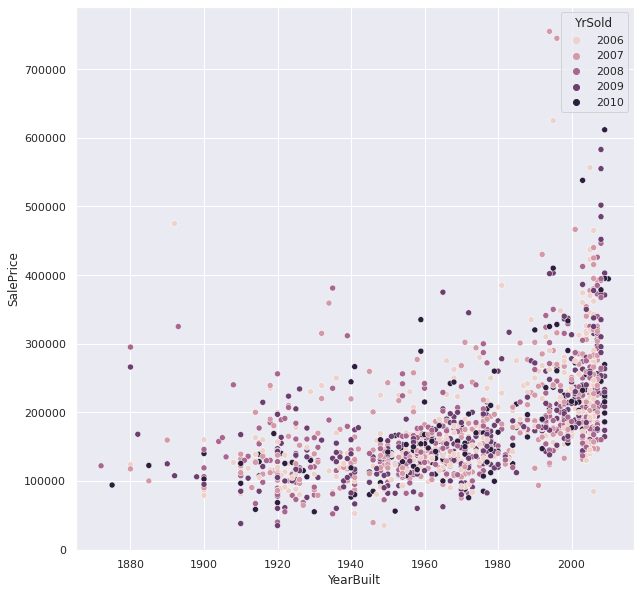

In [ ]:
sns.scatterplot(data=train_df, x="YearBuilt", y="SalePrice", hue="YrSold")

YearBuilt shows to be more usefull for us than YrSold.



---
**DAE Results**

Our correlation matrix showed which numerical features we should pay attention to. 

Other graphics gave us some intuition about the data.


---

#### Main Data Transformations

In [ ]:
# data transformation imputs

from sklearn.impute import KNNImputer

**Dataset contains time(year, month) and lots of categorical features.**

To work further we need to deal with this features

Firstly, we need to take care of na values.

Data transformations must be similar to all input data, so we need to unite our DataFrames

In [ ]:
# unite data
train_id = train_df['Id']
test_id = test_df['Id']
train_price = train_df['SalePrice']
train_df_concat = train_df.drop(['Id', 'SalePrice'], axis=1)
test_df_concat = test_df.drop(['Id'], axis=1)
all_df = pd.concat([train_df_concat, test_df_concat])
all_df.shape

(2919, 79)

##### **Dealing with NA values**

['GarageCars',
 'GarageArea',
 'KitchenQual',
 'Electrical',
 'SaleType',
 'Exterior1st',
 'TotalBsmtSF',
 'BsmtUnfSF',
 'Exterior2nd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'Functional',
 'Utilities',
 'BsmtHalfBath',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'BsmtExposure',
 'BsmtCond',
 'GarageType',
 'GarageFinish',
 'GarageYrBlt',
 'GarageQual',
 'GarageCond',
 'LotFrontage',
 'FireplaceQu',
 'Fence',
 'Alley',
 'MiscFeature',
 'PoolQC']

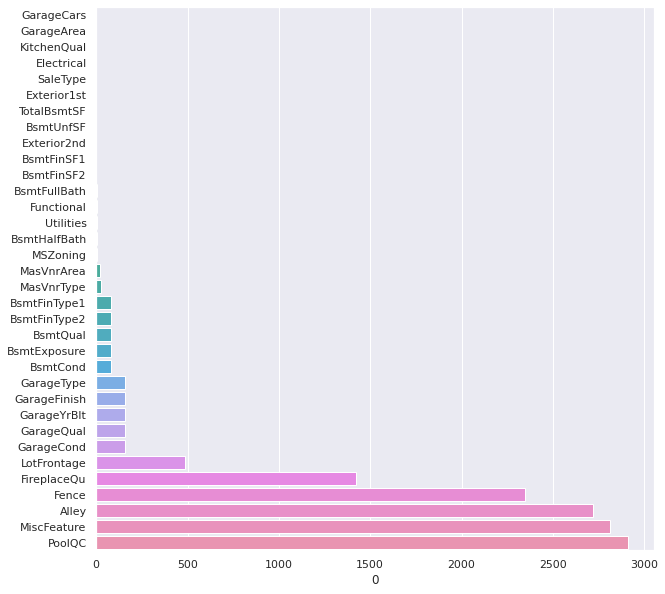

In [ ]:
# all na values

na = all_df.isna().sum().sort_values(ascending = True)
na = na[na > 0]
sns.barplot(data=na.to_frame(), x=0, y=na.index)
na.index.to_list()

In [ ]:
# filling na


all_df['Functional'] = all_df['Functional'].fillna('Typ')
all_df['Electrical'] = all_df['Electrical'].fillna('SBrkr')
all_df['KitchenQual'] = all_df['KitchenQual'].fillna('TA')


# columns to fill na with values mentioned in description
none_columns = ['MiscFeature', 'PoolQC', 'Alley', 'Fence', 'FireplaceQu', 
                'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
                'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1',
                'MasVnrType']

all_df[none_columns] = all_df[none_columns].fillna('None')

# columns to fill na with common value
mode_columns = ['SaleType', 'Utilities', 'Exterior2nd', 'Exterior1st', 'MSZoning', 'GarageYrBlt']

for col in mode_columns:
  all_df[col] = all_df[col].fillna(all_df[col].mode()[0])

# dropping some columns
drop_labels = ['GarageYrBlt']

#all_df.drop(columns=drop_labels, inplace=True)

# result of filling na
na = all_df.isna().any()
na[na == True].index.to_list()

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageCars',
 'GarageArea']

##### **Feature Generation and encoding**

We can use OneHot encoding to make categories usefull for model.

Why not to use label encoding?

Our category data in most cases is unordered, so label encoding will lead to misunderstanding the data by model.




In [ ]:
# feature generation

# square feet of high quality on second and first floor
all_df['HighQuality_Area'] = all_df['1stFlrSF'] + all_df['2ndFlrSF'] - all_df['LowQualFinSF']

all_df['Overall_GrLiving'] = all_df['OverallQual'] * all_df['GrLivArea']

all_df['Garage_Total'] = all_df['GarageCars'] * all_df['GarageArea']

all_df['BathRoom_Total'] = all_df['BsmtFullBath'] + 1/2 * all_df['BsmtHalfBath']

# composit grade of house
all_df['Super_Grade'] = (all_df['OverallQual'] + all_df['OverallCond']) / 20

In [ ]:
# change date-type column types to object
date_type_columns = ['YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold']

all_df[date_type_columns].astype('str')

# create dummies for all categorical data features

dummy_df = pd.get_dummies(all_df)

dummy_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,HighQuality_Area,Overall_GrLiving,Garage_Total,BathRoom_Total,...,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,1710,11970,1096.0,1.0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,1262,7572,920.0,0.5,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,1786,12502,1216.0,1.0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,1717,12019,1926.0,1.0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,2198,17584,2508.0,1.0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
# check types of resulting DataFrame
dummy_df.dtypes.value_counts()

uint8      266
int64       27
float64     14
dtype: int64

##### **Skewing data**

It will help us to predict rare big prices for uncommon houses.

Source article [here](https://opendatascience.com/transforming-skewed-data-for-machine-learning/).

In [ ]:
numeric_features = dummy_df.dtypes[dummy_df.dtypes != object].index
skewed_features = dummy_df[numeric_features].skew().sort_values(ascending=False)
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index
    
for i in skew_index:
    dummy_df[i] = np.log1p(dummy_df[i])


train_price_log = np.log1p(train_price)

##### Use KNN to fill numeric NA

In [ ]:
imputer = KNNImputer(n_neighbors=3)
dummy_df = pd.DataFrame(imputer.fit_transform(dummy_df),columns = dummy_df.columns)

# result of predicting na
na = dummy_df.isna().any()
na[na == True].index.to_list()

[]

## Model Section

In [ ]:
!pip3 install catboost
!pip3 install bayesian-optimization

# imports for model
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score, mean_absolute_error
import xgboost as xgb
from catboost import CatBoostRegressor
from catboost import Pool
from lightgbm import LGBMRegressor
from bayes_opt import BayesianOptimization

     |████████████████████████████████| 67.3MB 57kB/s 
  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-cp37-none-any.whl size=11687 sha256=72eb138ab446ee4a29478f11537ea8c1b2028c83ae6699a4630d373294a31648
  Stored in directory: /root/.cache/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization


In [ ]:
random_state = 55

In [ ]:
# splitting united dataframe

dummy_train = dummy_df.iloc[train_id.index]
dummy_test = dummy_df.iloc[test_id - 1]

X_train,X_val,y_train,y_val = train_test_split(dummy_train,train_price_log,test_size = 0.1, random_state=random_state)

--- 

#### **Metrics**

We have regression problem - predicting prices

Metrics we can use for this:

  1. (R)MSPE, MAPE

    Relative error isn`t usefull for predicting prices in this case. We need to minimize difference between prediction and real values.
  
  2. MAE, (R)MSLE

    This metrics are robust to outliers. It means that it less punish model for them than MSE.

  3. MSE, (R)MSE, R-squared

    Finally, because our data contains unexpected prices ('outliers') we should still care about, we should use this metrics.

---


In [ ]:
# metrics

rmse = lambda y_actual, y_predicted: np.sqrt(mean_squared_error(y_actual, y_predicted))

def show_metrics(model):
  pred_val = model.predict(X_val)
  pred_train = model.predict(X_train)

  print('RMSE Validation: {0}'.format(rmse(y_val, pred_val)))

  print('RMSE Train: {0}'.format(rmse(y_train, pred_train)))

  print('R2_score: {0}'.format(r2_score(y_val, pred_val)))

  print('MAE : {0}'.format(mean_absolute_error(np.expm1(y_val), np.expm1(pred_val))))

In [ ]:
# function for drawing plots to visualize prediction results

def prediction_plots(model):

  pred_price = np.expm1(model.predict(X_val))
  real_price = np.expm1(y_val.to_list())

  pred_df = pd.DataFrame()
  pred_df['price'] = pred_price
  pred_df['id'] = pred_df.index
  pred_df['type'] = 'pred'

  real_df = pd.DataFrame()
  real_df['price'] = real_price
  real_df['id'] = real_df.index
  real_df['type'] = 'real'

  price_df = pd.concat([real_df, pred_df])

  price_df['diff'] = real_df['price'] - pred_df['price']

  _, axs = plt.subplots(1, 2, figsize=(15,10))

  sns.lineplot(x="id", y="price", ax=axs[0], hue="type", data=price_df)
  
  sns.scatterplot(x="id", y="diff", ax=axs[1], data=price_df);

#### Model selection and Training


We have a lot of categorical data so we can try to use Tree-based ML algorithms for to make predictions.

Let`s see how basic Tree models will perform

In [ ]:
# trying models

models_df = pd.DataFrame(columns=['model', 'mean', 'std'])

kf = KFold(n_splits=7, random_state=random_state, shuffle=True)

test_models = [
               xgb.XGBRegressor(objective='reg:squarederror'),
               LGBMRegressor(), 
               CatBoostRegressor(verbose=False)
              ]

for m in test_models:
  score = -cross_val_score(m, dummy_train, train_price_log, scoring="neg_root_mean_squared_error", cv=kf)
  models_df = models_df.append({'model': type(m), 'mean': score.mean(), 'std': score.std()}, ignore_index=True)

models_df.head()

,model,mean,std
0,<class 'xgboost.sklearn.XGBRegressor'>,0.133086,0.018987
1,<class 'lightgbm.sklearn.LGBMRegressor'>,0.135116,0.017610
2,<class 'catboost.core.CatBoostRegressor'>,0.123946,0.021108


**The best is CatBoostRegressor**

Let`s try to train this model


RMSE Validation: 0.09650429248882914
RMSE Train: 0.0463618090692795
R2_score: 0.9410437904937418
MAE : 12315.80893675178


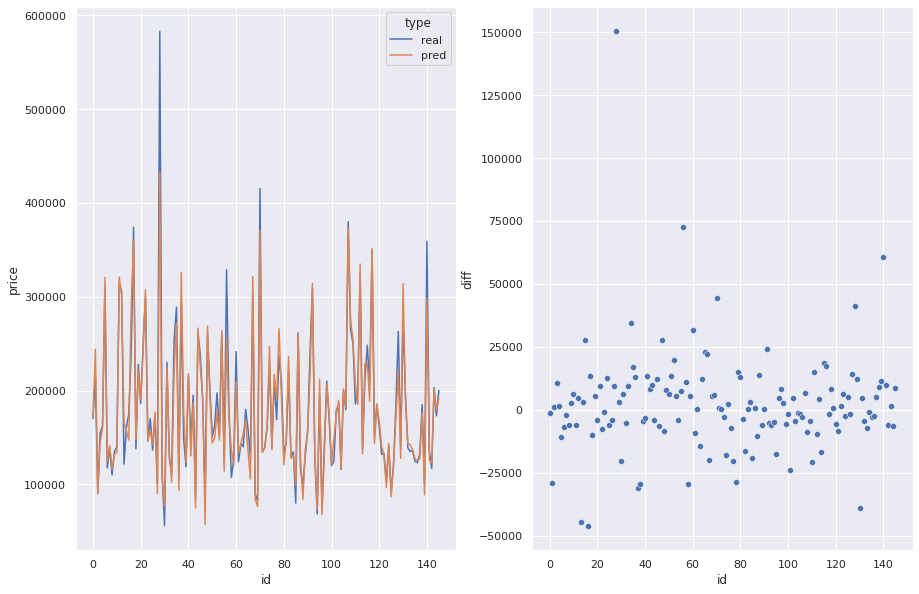

In [ ]:
cat_model = CatBoostRegressor(verbose=False)

cat_model = cat_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

show_metrics(cat_model)

prediction_plots(cat_model)

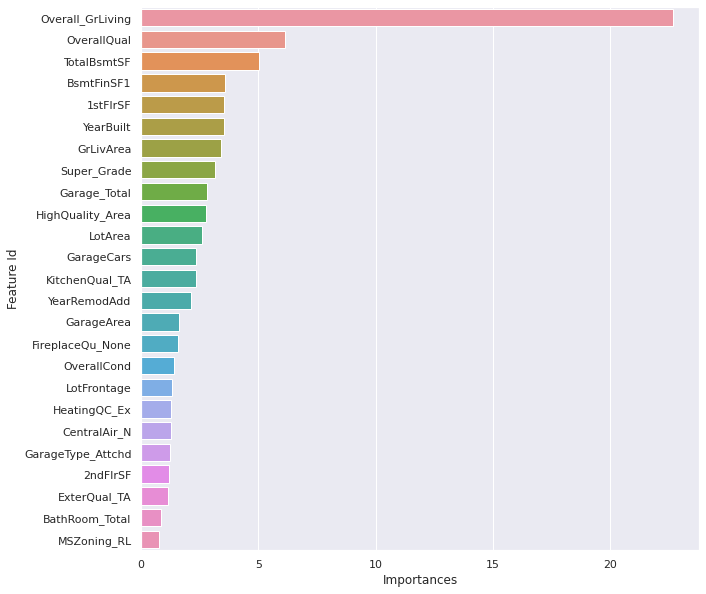

In [ ]:
#importance plots

cat_feat_imp = cat_model.get_feature_importance(prettified=True)

sns.barplot(data=cat_feat_imp[:25], x='Importances', y='Feature Id')


#### Feature Selection

In this case we can just try to drop useless features due to importance

In [ ]:
# finding columns to drop
min_importance = 0.0001

column_to_drop = cat_feat_imp[cat_feat_imp['Importances'] < min_importance]['Feature Id'].to_list()
print('We have {0} columns to drop'.format(len(column_to_drop)))

We have 96 columns to drop


In [ ]:
# dropping columns and making split

selected_df = dummy_df.drop(column_to_drop, axis=1)

selected_train = selected_df.iloc[train_id.index]
selected_test = selected_df.iloc[test_id - 1]

X_selected_train,X_selected_val,y_selected_train,y_selected_val = train_test_split(selected_train,train_price_log,test_size = 0.1, random_state=random_state)
X_selected_train.shape

(1314, 211)

In [ ]:
# fitting with selected data

cat_model = CatBoostRegressor(verbose=False)

cat_model = cat_model.fit(X_selected_train, y_selected_train, eval_set=[(X_selected_val, y_selected_val)], verbose=False)

show_metrics(cat_model)

RMSE Validation: 0.09307998821501574
RMSE Train: 0.03155686842790518
R2_score: 0.9451534984800012
MAE : 12181.571121288413


#### Basic Model Optimization

In [ ]:
cat_model.get_all_params()

{'auto_class_weights': 'None',
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': True,
 'boosting_type': 'Plain',
 'bootstrap_type': 'MVS',
 'border_count': 254,
 'classes_count': 0,
 'depth': 6,
 'eval_metric': 'RMSE',
 'feature_border_type': 'GreedyLogSum',
 'grow_policy': 'SymmetricTree',
 'iterations': 1000,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 1,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.048517998307943344,
 'loss_function': 'RMSE',
 'max_leaves': 64,
 'min_data_in_leaf': 1,
 'model_shrink_mode': 'Constant',
 'model_shrink_rate': 0,
 'model_size_reg': 0.5,
 'nan_mode': 'Min',
 'penalties_coefficient': 1,
 'pool_metainfo_options': {'tags': {}},
 'posterior_sampling': False,
 'random_seed': 0,
 'random_strength': 1,
 'rsm': 1,
 'sampling_frequency': 'PerTree',
 'score_function': 'Cosine',
 'sparse_features_conflict_fraction': 0,
 'subsample': 0.800000011920929

In [ ]:
# optimization function

kf_optimizer = KFold(n_splits=3, random_state=random_state, shuffle=True)

def catboost_opt(depth, l2_leaf_reg, learning_rate, border_count):
    params = {
        "loss_function": "RMSE",
        "eval_metric" : "RMSE", 
        "depth" : int(depth),
        "l2_leaf_reg" : int(l2_leaf_reg),
        "learning_rate" : learning_rate,
        "iterations": 5000,
        "random_state" : random_state,
        "border_count" : int(border_count),
        "early_stopping_rounds": 300,
        "task_type": "GPU",
        "logging_level" : "Silent"
        }
    cv_result = cross_val_score(CatBoostRegressor(**params), selected_train, train_price_log, scoring="neg_root_mean_squared_error", cv=kf_optimizer)
    return cv_result.mean()

In [ ]:
# search_params = {'depth': (3, 8),
#        'l2_leaf_reg': (1, 5),
#        'learning_rate': (0.03, 0.08),
#        'border_count': (700, 1500)
#        }

# optimizer = BayesianOptimization(catboost_opt, search_params, random_state=random_state)
                                  
# optimizer.maximize(init_points=2, n_iter=10)

0:	learn: 0.3846264	test: 0.3814109	best: 0.3814109 (0)	total: 17.8ms	remaining: 1m 28s
50:	learn: 0.1368351	test: 0.1222194	best: 0.1222194 (50)	total: 756ms	remaining: 1m 13s
100:	learn: 0.1056469	test: 0.0972674	best: 0.0972674 (100)	total: 1.47s	remaining: 1m 11s
150:	learn: 0.0920905	test: 0.0945669	best: 0.0944975 (146)	total: 2.17s	remaining: 1m 9s
200:	learn: 0.0820311	test: 0.0925833	best: 0.0925703 (188)	total: 2.89s	remaining: 1m 9s
250:	learn: 0.0740863	test: 0.0928672	best: 0.0925703 (188)	total: 3.59s	remaining: 1m 7s
300:	learn: 0.0672721	test: 0.0923836	best: 0.0923836 (300)	total: 4.31s	remaining: 1m 7s
350:	learn: 0.0614854	test: 0.0919260	best: 0.0918506 (349)	total: 5.02s	remaining: 1m 6s
400:	learn: 0.0565554	test: 0.0920999	best: 0.0914825 (358)	total: 5.74s	remaining: 1m 5s
450:	learn: 0.0517322	test: 0.0923674	best: 0.0914825 (358)	total: 6.45s	remaining: 1m 5s
500:	learn: 0.0476235	test: 0.0919137	best: 0.0914825 (358)	total: 7.15s	remaining: 1m 4s
550:	learn: 

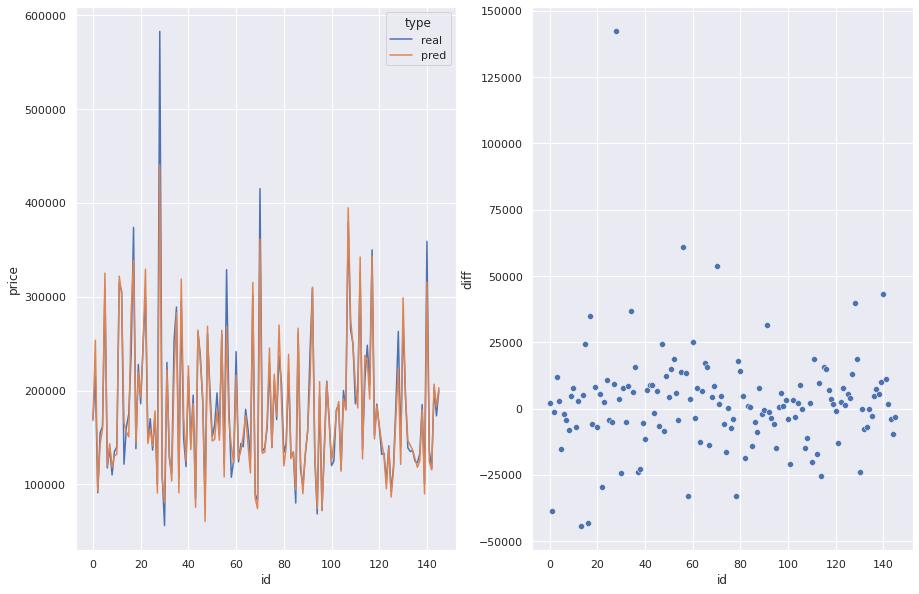

In [ ]:
# use data given by optimizator to optimize params

params = {
  'depth': 6,
  'iterations': 5000,
  'l2_leaf_reg': 2,
  'learning_rate': 0.055,
  'border_count': 1300,
  'verbose': 50,
  'early_stopping_rounds': 500
  }


cat_optimized_model = CatBoostRegressor(**params)

cat_optimized_model = cat_optimized_model.fit(X_selected_train, y_selected_train, eval_set=[(X_selected_val, y_selected_val)])

plt.show()

show_metrics(cat_optimized_model)

prediction_plots(cat_model)

## Submission

Saving predictions to file

In [ ]:
test_pred = cat_model.fit(selected_train, train_price_log, verbose=100).predict(selected_test)
submission = pd.DataFrame(test_id, columns = ['Id'])
test_pred = np.expm1(test_pred)
submission['SalePrice'] = test_pred 
submission.head()

Learning rate set to 0.04175
0:	learn: 0.3882181	total: 9.58ms	remaining: 9.57s
100:	learn: 0.1170830	total: 906ms	remaining: 8.06s
200:	learn: 0.0935896	total: 1.79s	remaining: 7.12s
300:	learn: 0.0808301	total: 2.67s	remaining: 6.19s
400:	learn: 0.0715866	total: 3.54s	remaining: 5.28s
500:	learn: 0.0637867	total: 4.38s	remaining: 4.37s
600:	learn: 0.0570145	total: 5.25s	remaining: 3.48s
700:	learn: 0.0511955	total: 6.14s	remaining: 2.62s
800:	learn: 0.0462674	total: 7.02s	remaining: 1.74s
900:	learn: 0.0420066	total: 7.89s	remaining: 867ms
999:	learn: 0.0383592	total: 8.75s	remaining: 0us


,Id,SalePrice
0,1461,123626.811322
1,1462,158142.470867
2,1463,183114.508349
3,1464,191434.016444
4,1465,181108.796089


In [ ]:
submission.to_csv("prediction.csv", index = False, header = True)